In [2]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# from numpy import genfromtxt
# from sklearn.decomposition import PCA, FastICA
# my_data = genfromtxt("/Users/lizhe/Library/Mobile Documents/com~apple~CloudDocs/SortedSingleDimPOIs2.csv", delimiter=',')
# # x range: from -90 to 90, the first column
# # y range: from -180 to 180, the second column

In [21]:
# by default, use Gaussian distribution to generate the synthetic query workload
# @center_amount: assume the queries are clustered into that amount of clusters
# @point_amount: the number of queries in each cluster
# @dimensions: the domain of each dimension, the range should at least 8 times the sigma value
# @sigma: the sigma of Gaussian distribution
import random
def generate_query(center_amount=10, point_amount=10, dimensions=[[-180,180],[-90,90]], sigma=[10,5]):
    
    random.seed()
    num_dims = len(dimensions)
    
    queries = []
    for j in range(2*num_dims):
        queries.append([])
    
    # for each cluster
    for i in range(center_amount):
        
        # determin the cluster center on each dimension
        cluster_center = []
        
        # for each dimension
        for j in range(num_dims):
            
            # to assure the distribution do not exceed the border
            dim_range = dimensions[j][1]-dimensions[j][0] - 8*sigma[j]
            center1D = random.randrange(dim_range)
            center1D += (dimensions[j][0] + 4*sigma[j])
            cluster_center.append(center1D)
            
            # for each query
            for k in range(point_amount):
                
                #determin the lower bound
                lower1D = random.gauss(center1D, sigma[j])
                upper1D = random.gauss(center1D, sigma[j])
                
                if lower1D > upper1D:
                    lower1D, upper1D = upper1D, lower1D
                    
                queries[2*j].append(lower1D)
                queries[2*j+1].append(upper1D)
                
    # transform the query structure
    temp_queries = []
    values = []
    for i in range(len(queries[0])):
        for j in range(2*num_dims):
            values.append(queries[j][i])
        temp_queries.append(values)
        values=[]
            
    # return queries
    return temp_queries

In [22]:
# save the array into csv
import csv
def write_csv_file(path, head, data):  
    try:  
        with open(path, 'w', newline='') as csv_file:  
            writer = csv.writer(csv_file, dialect='excel')  
  
            if head is not None:  
                writer.writerow(head)  
  
            for row in data:  
                writer.writerow(row)  
  
            print("Write a CSV file to path %s Successful." % path)  
    except Exception as e:  
        print("Write an CSV file to path: %s, Case: %s" % (path, e))

In [23]:
dimensions_ = [[1,1.20000000e+07],[1,4.00000000e+05],[1,2.00000000e+04]]

In [24]:
# generate the queries
query_collection = generate_query(center_amount=1000, point_amount=10, dimensions=dimensions_, sigma=[10000,100,10])
write_csv_file("/Users/lizhe/Desktop/LearnedKDTree/DataAndWorkload/SyntheticWorkload/TPCH_C1000_P10_S10000_100_10.csv",None,query_collection)

Write a CSV file to path /Users/lizhe/Desktop/LearnedKDTree/DataAndWorkload/SyntheticWorkload/TPCH_C1000_P10_S10000_100_10.csv Successful.


In [13]:
# plot 3D query
# TODO
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# import matplotlib.pyplot as plt
# def plot3DQuery(queries):
#     fig = flt.figure()
#     ax = Axes3D(fig)
#     for i in range(len(query_collection))
#         x = []
#         y = []
#         z = []
#         vertexes = [list(zip(x,y,z))]
#         ax.add_collection3d(Poly3DCollection(vertexes))
#     plt.show()

In [25]:
# plot the queries, only in 2D
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

# @query_collection: could be more than 2 dimensions
# @domains: the domain of the plot dimensions, shoud be corresponding with the order of plotdim
def plot_queries_2d(query_collection, domains, plotdim=[0,1]):
    
    fig, ax = plt.subplots(1)
    
    plt.xlim(domains[0][0],domains[0][1])
    plt.ylim(domains[1][0],domains[1][1])
    
    # transform the queries into boxes
    query_size = len(query_collection)
    # the number of boxed that will be plotted
    boxes = []
    for i in range(query_size):
        lower1 = query_collection[i][2*plotdim[0]]
        upper1 = query_collection[i][2*plotdim[0]+1]
        lower2 = query_collection[i][2*plotdim[1]]
        upper2 = query_collection[i][2*plotdim[1]+1]
        rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='r',linewidth=1)
        ax.add_patch(rect)
    
    plt.show()

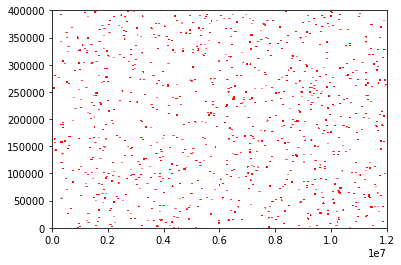

In [26]:
plot_queries_2d(query_collection,[[1,1.20000000e+07],[1,4.00000000e+05]],[0,1])

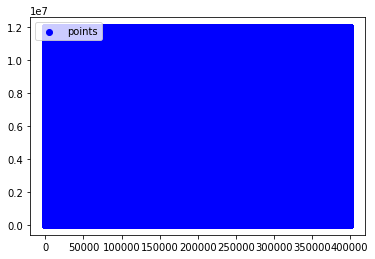

In [17]:
# the origin 12M TPCH dataset
import numpy as np
from numpy import genfromtxt
my_data = genfromtxt("/Users/lizhe/Desktop/LearnedKDTree/DataAndWorkload/SyntheticData/TPCH_12M_8Field.csv", delimiter=',')
# # x range: from -90 to 90, the first column
# # y range: from -180 to 180, the second column
long_batch = my_data[:,0]
lat_batch = my_data[:,1]
plt.scatter(lat_batch, long_batch, color='b', label='points')
plt.legend(loc='upper left')
plt.show()

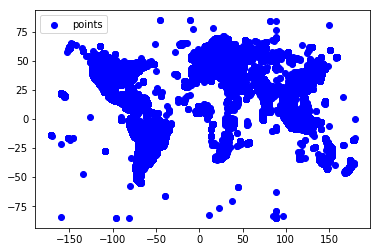

In [83]:
# the origin twitter dataset
import numpy as np
from numpy import genfromtxt
my_data = genfromtxt("/Users/lizhe/Library/Mobile Documents/com~apple~CloudDocs/SortedSingleDimPOIs2.csv", delimiter=',')
# # x range: from -90 to 90, the first column
# # y range: from -180 to 180, the second column
long_batch = my_data[:,0]
lat_batch = my_data[:,1]
plt.scatter(lat_batch, long_batch, color='b', label='points')
plt.legend(loc='upper left')
plt.show()
